<a href="https://colab.research.google.com/github/Dayanand07/Bike-Sharing-Demand-Prediction/blob/main/Dayanand_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [114]:
df=pd.read_csv('/content/SeoulBikeData.csv', encoding="latin")

# **Exploring Dataset**

In [115]:
#displaying top 5 entries of dataset to get an idea about dataset 
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### **Checking Information about Dataset**

In [4]:
#checking information about dataset & types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Checking Null Values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Summary statastics Of Dataset**

In [6]:
#Summary Statastics
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Exploratory Data Analysis**

In [7]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])


In [9]:
df['Year']=df['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


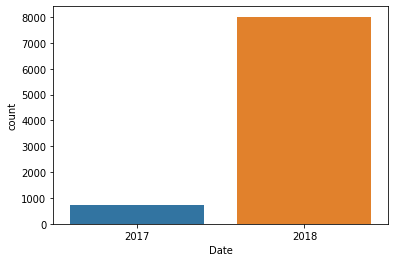

In [10]:
sns.countplot(df['Date'].dt.year)

In [11]:
df['Month']=df['Date'].dt.month

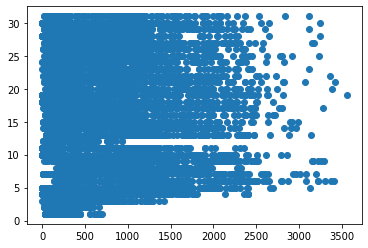

In [12]:
plt.scatter(df['Rented Bike Count'],df['Date'].dt.day)

In [13]:
df['Day']=df['Date'].dt.day

In [14]:
df=df.drop(columns=["Date"])

<Figure size 1440x1080 with 0 Axes>

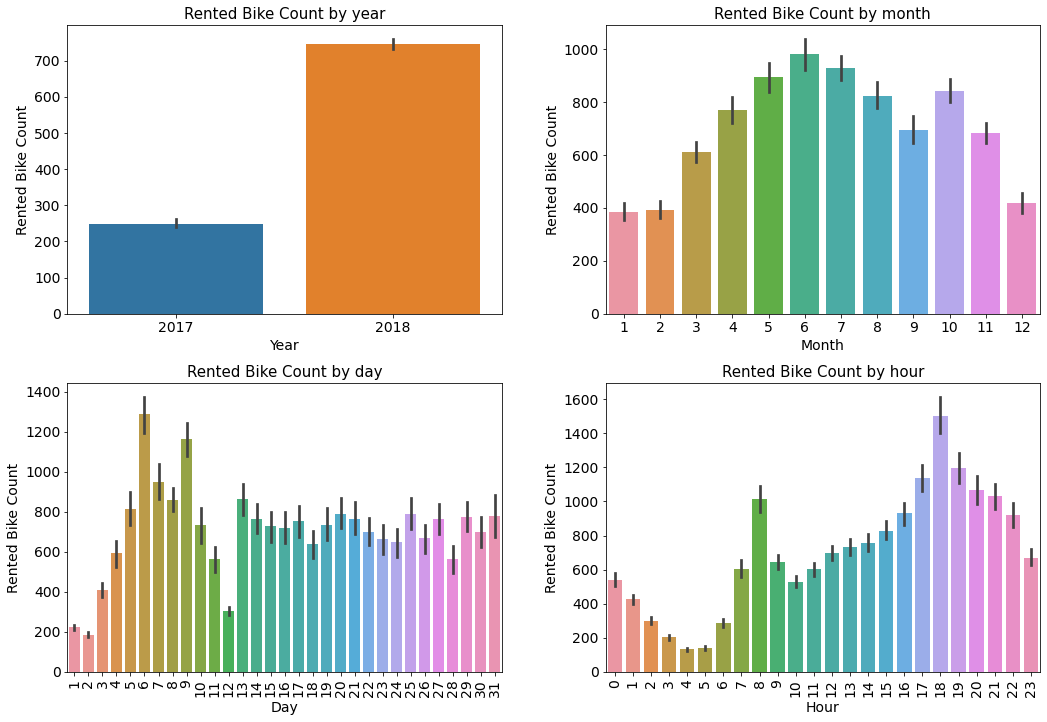

In [15]:
# Step 1 : Prepare m rows n columns Figure
plt.figure(figsize=(20,15))
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # Make Figure in 3rows 2columns

plt.tight_layout(0.1) # Padding between the graphs
figure.set_size_inches(15, 10) # Set total Figure size


sns.barplot(x='Year', y='Rented Bike Count', data=df, ax=axes[0, 0])
sns.barplot(x='Month', y='Rented Bike Count', data=df, ax=axes[0, 1])
sns.barplot(x='Day', y='Rented Bike Count', data=df, ax=axes[1, 0])
sns.barplot(x='Hour', y='Rented Bike Count', data=df, ax=axes[1, 1])


# Step 3: Detailed Settings
# 3.1 Set subplots' title
axes[0, 0].set(title='Rented Bike Count by year')
axes[0, 1].set(title='Rented Bike Count by month')
axes[1, 0].set(title='Rented Bike Count by day')
axes[1, 1].set(title='Rented Bike Count by hour')

# 3.2 Rotate 90 degrees of the x-axis labels of the subplots in row 1
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

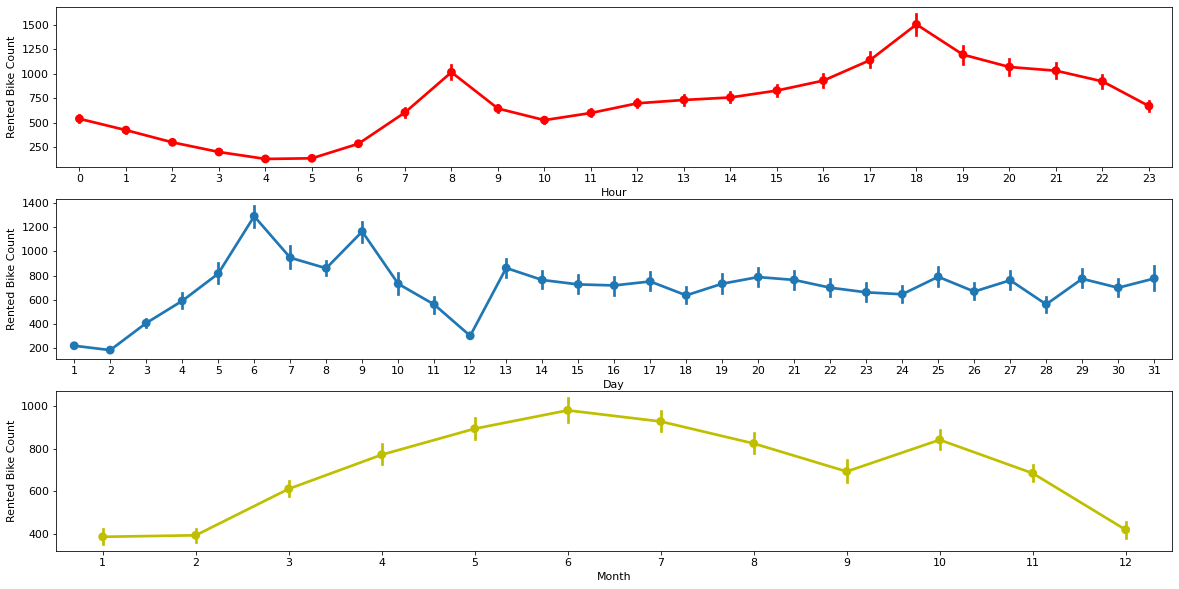

In [16]:
mpl.rc('font', size=11)

figure, axes = plt.subplots(nrows=3,figsize=(20,10))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',color='r',ax=axes[0])
sns.pointplot(data=df,x='Day',y='Rented Bike Count',ax=axes[1])
sns.pointplot(data=df,x='Month',y='Rented Bike Count',color='y',ax=axes[2])

There Is Rise In the Mid quarter of the year , and Again a rise in the 10th month , but People donot prefer bikes in winter


So the day will not affect No of bikes that are being rented

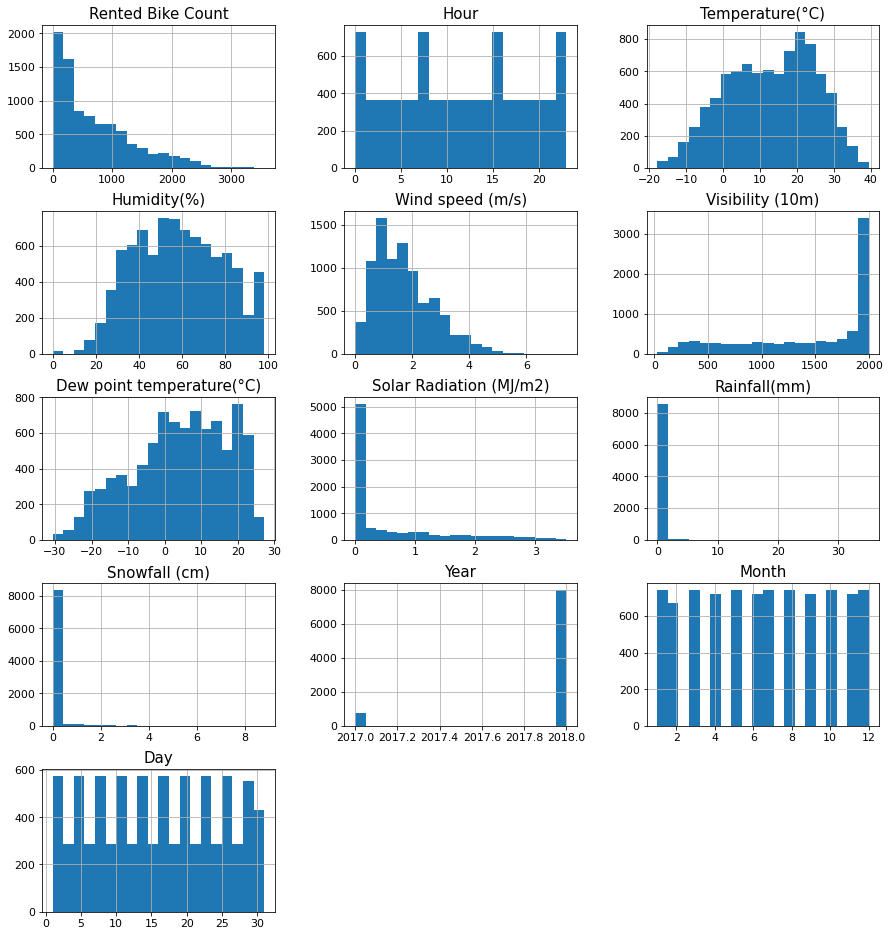

In [17]:
df.hist(bins=20,figsize=(15,30),layout=(9,3))
plt.show()

Rainfall and snow fall are highly Right Skewed high rainfall and high Snow fall is lesws likely to occur we can see there trend with the bikes rented

TREND FOR DEPENDENT VARIABLE

In [18]:
df=df[df['Functioning Day']=='Yes']

In [19]:
df=df.drop(columns=['Functioning Day'])

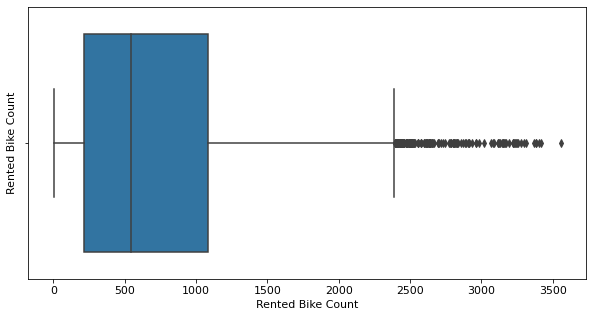

In [20]:

plt.figure(figsize=(10,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

This Shows presense of outliers on Right side


In [21]:
def round_int(x):
    if x in [float("-inf"),float("inf")]: return float("nan")
    return int(round(x))


So we should Take Square root of Y to make it normally distributed

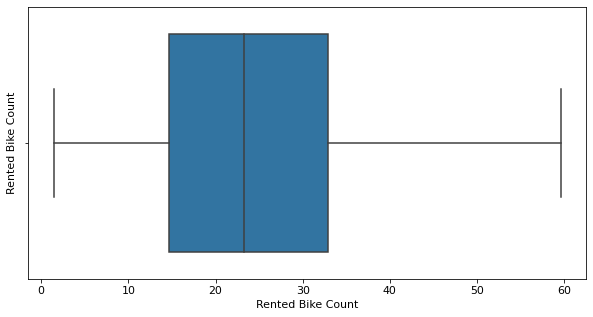

In [22]:

plt.figure(figsize=(10,5))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

## **categorical_variables**

In [23]:
categorical_variables=list(set(df.columns)-set(df.describe().columns))   #categorical_variables

In [24]:
categorical_variables

['Seasons', 'Holiday']

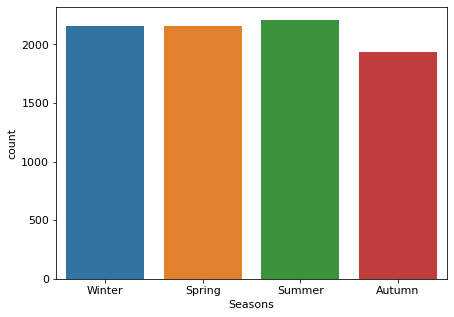

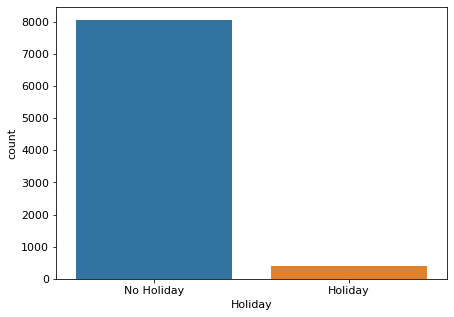

In [25]:
for column in categorical_variables:
  if df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.countplot(x=column,data=df[categorical_variables])
    #plt.legend()
    plt.show()

BarPlot of categorical variables with dependent variable

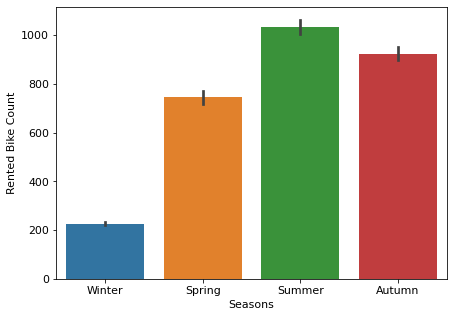

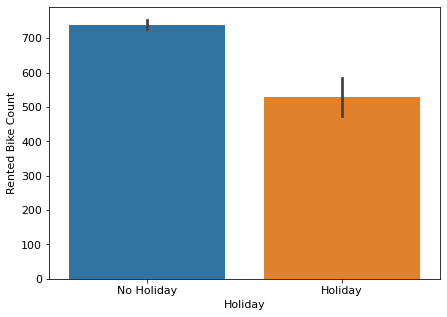

In [26]:

for column in categorical_variables:
  if df[column].nunique() < 14:
    plt.figure(figsize=(7,5)) 
    sns.barplot(x=column,y='Rented Bike Count',data=df)
    #plt.legend()
    plt.show()

#**LabelEncoder**

In [27]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [28]:
df[categorical_variables]=df[categorical_variables].apply(lambda X: encode.fit_transform(X))
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,2017,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,2017,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,2017,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,2017,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,2017,1,12


#**Correlation Trend**

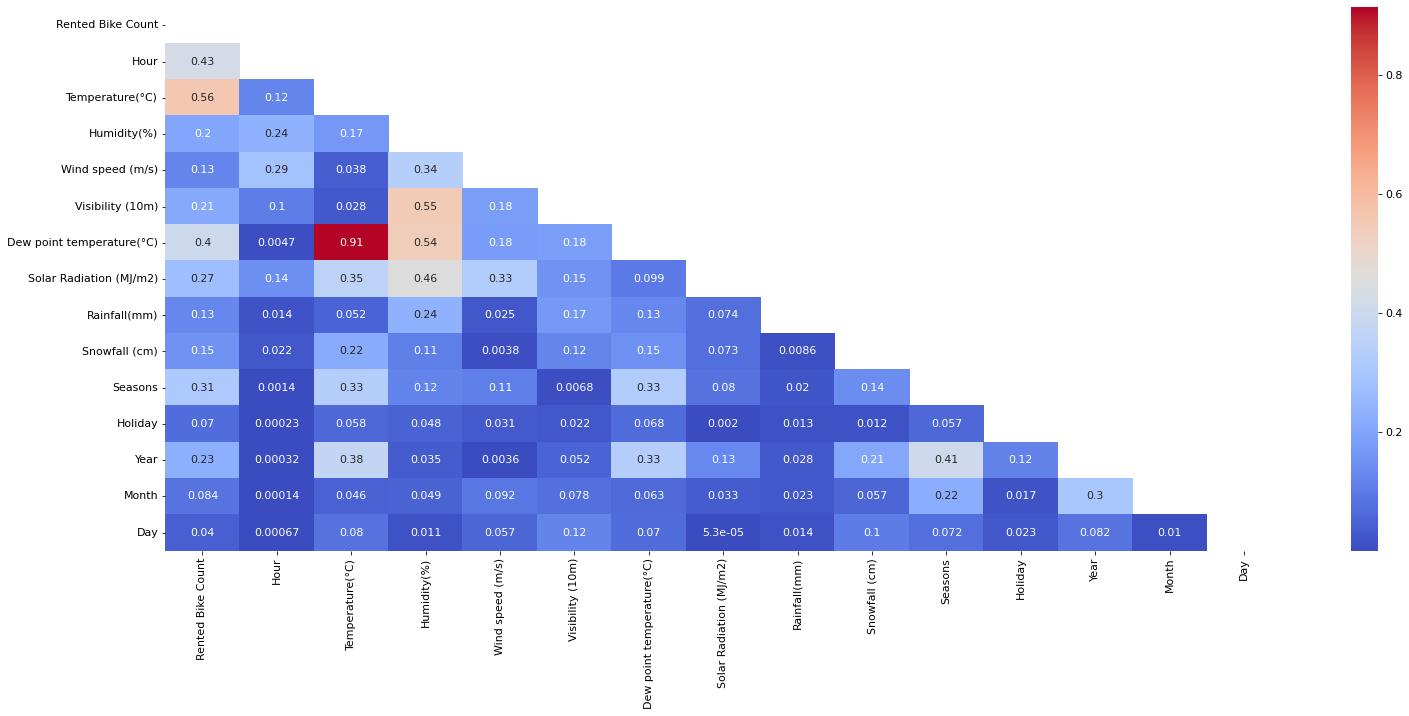

In [29]:
plt.figure(figsize=(25,10))
cor=df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')


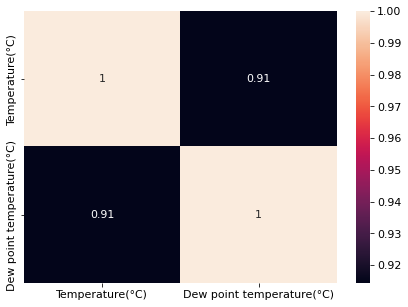

In [30]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["Temperature(°C)",'Dew point temperature(°C)']].corr(),annot=True)

The dew point is the temperature at which air is saturated with water vapor, which is the gaseous state of water.

When air has reached the dew-point temperature at a particular pressure, the water vapor in the air is in equilibrium with liquid water, meaning water vapor is condensing at the same rate at which liquid water is evaporating.

Below the dew point, liquid water will begin to condense on solid surfaces (such as blades of grass) or around solid particles in the atmosphere (such as dust or salt), forming clouds or fog.

Dew point is closely linked to relative humidity, which is the ratio of the pressure of water vapor in a parcel of air relative to the saturation pressure of water vapor in that same parcel of air at a specific temperature. Relative humidity (RH) is expressed as a percentage.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   int64  
 11  Holiday                    8465 non-null   int64  
 12  Year                       8465 non-null   int64  
 13  Month                      8465 non-null   int64

#**Check For Multicollinearity**

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
calc_vif(df.drop(columns=['Rented Bike Count']))

,variables,VIF
0,Hour,4.450696
1,Temperature(°C),187.476125
2,Humidity(%),184.453258
3,Wind speed (m/s),4.889265
4,Visibility (10m),10.751833
5,Dew point temperature(°C),127.534127
6,Solar Radiation (MJ/m2),2.891569
7,Rainfall(mm),1.104359
8,Snowfall (cm),1.170954
9,Seasons,3.606545


In [34]:
calc_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

,variables,VIF
0,Hour,4.440921
1,Temperature(°C),3.702601
2,Humidity(%),23.615888
3,Wind speed (m/s),4.880791
4,Visibility (10m),10.684605
5,Solar Radiation (MJ/m2),2.749961
6,Rainfall(mm),1.090820
7,Snowfall (cm),1.164645
8,Seasons,3.587639
9,Holiday,20.924011


In [35]:
time_periods=['Year','Month','Day']

In [36]:
df[time_periods]=df[time_periods].apply(lambda X: encode.fit_transform(X))

In [37]:
calc_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

,variables,VIF
0,Hour,4.173572
1,Temperature(°C),3.595709
2,Humidity(%),13.801984
3,Wind speed (m/s),4.793141
4,Visibility (10m),8.007655
5,Solar Radiation (MJ/m2),2.449007
6,Rainfall(mm),1.085251
7,Snowfall (cm),1.161142
8,Seasons,3.569974
9,Holiday,18.474374


There Is Highly Multicollinear_features which need to be maniupulated

In [38]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

In [39]:
numerical_columns=df.describe().columns.to_list()
dependent_variable='Rented Bike Count'

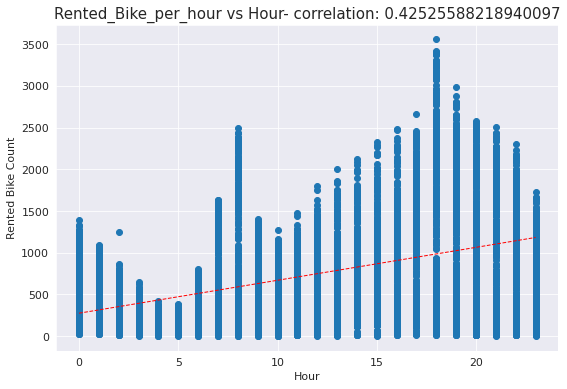

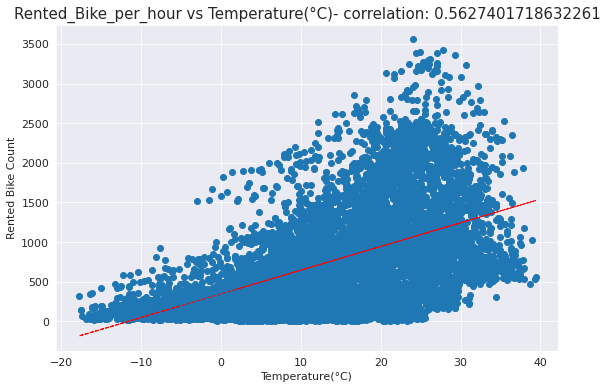

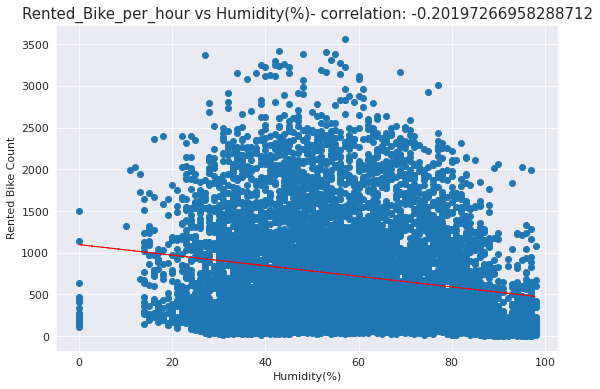

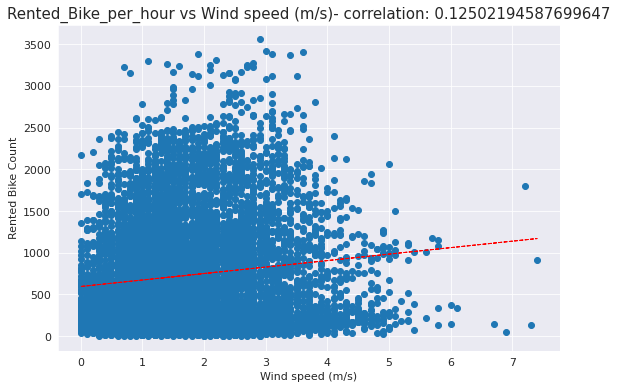

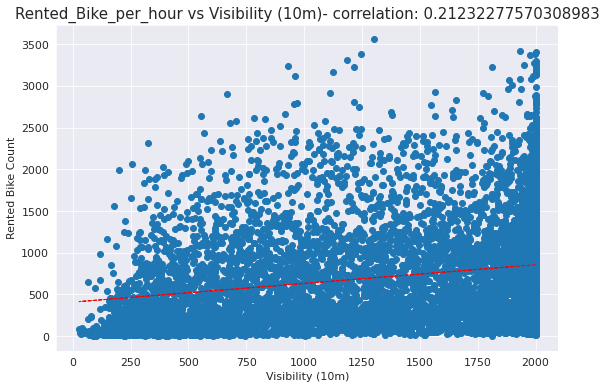

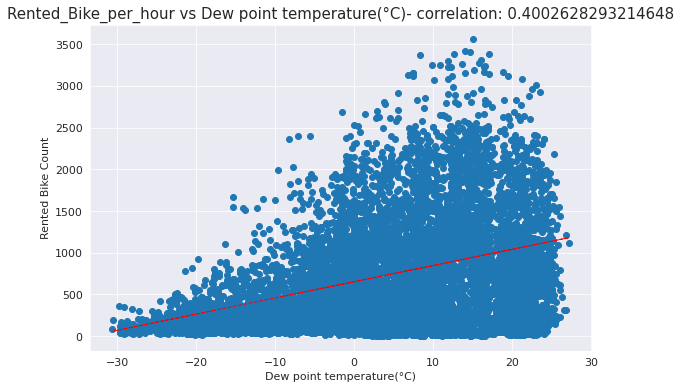

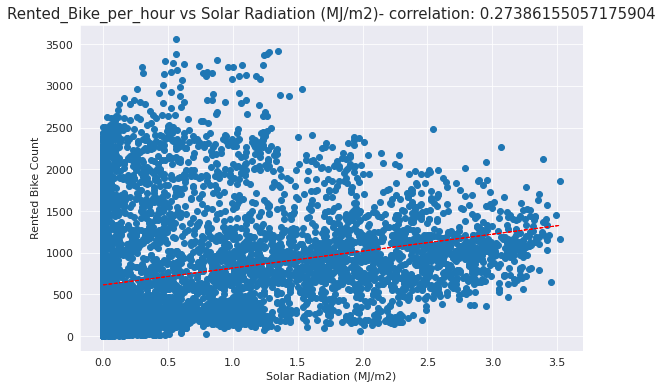

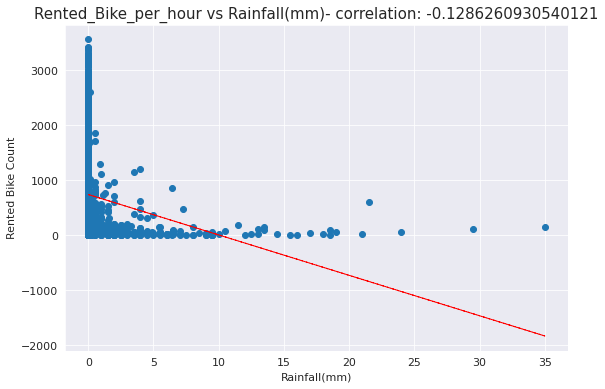

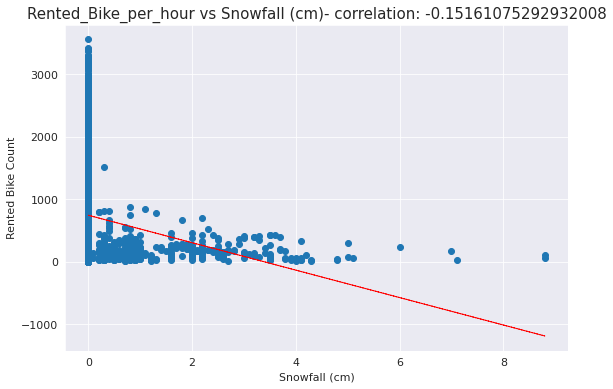

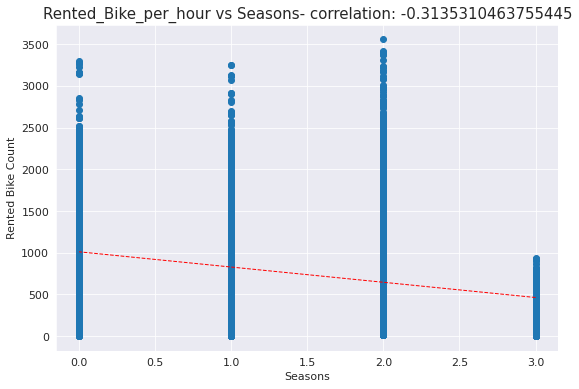

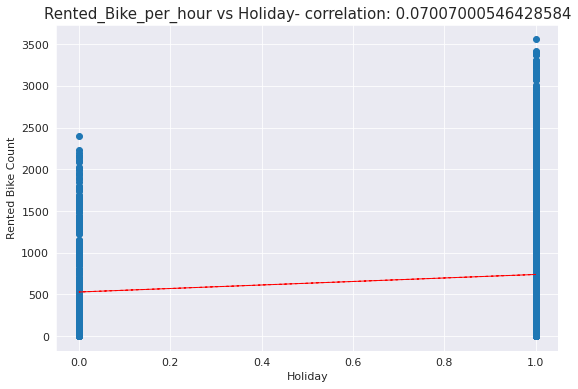

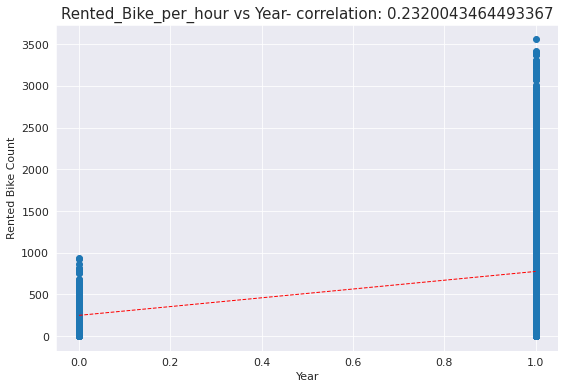

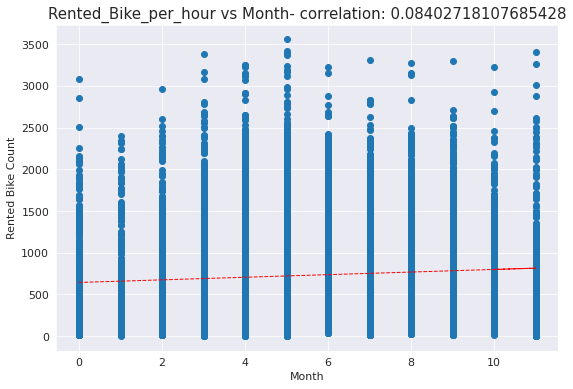

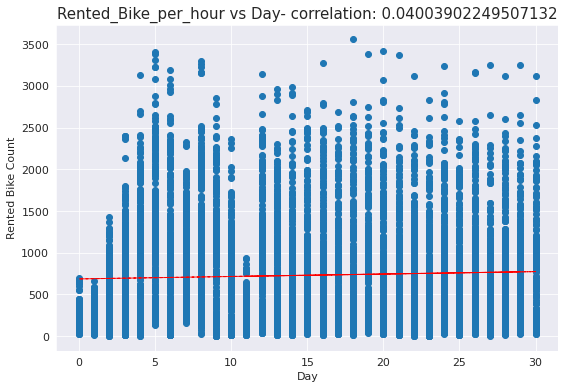

In [40]:
sns.set_style('darkgrid')
for col in numerical_columns:
    if col !=dependent_variable:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        label = df[dependent_variable]
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel(dependent_variable)
        ax.set_title('Rented_Bike_per_hour vs ' + col + '- correlation: ' + str(correlation))
        z = np.polyfit(df[col], df[dependent_variable], 1)
        y_hat = np.poly1d(z)(df[col])

        plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

Applying Ordinary least Square to entire daset sense it is not realy a large data to check Y or Squareroot of Y which gives better results

In [41]:
X=df.drop(columns=['Rented Bike Count']).values
y=df['Rented Bike Count'].values

In [42]:
X.shape

(8465, 14)

In [43]:
import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     714.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:39:11   Log-Likelihood:                -63432.
No. Observations:                8465   AIC:                         1.269e+05
Df Residuals:                    8450   BIC:                         1.270e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        891.4387    102.563      8.692      0.0

In [44]:
 import statsmodels.api as sm
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(np.sqrt(y), X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     976.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:39:12   Log-Likelihood:                -28872.
No. Observations:                8465   AIC:                         5.777e+04
Df Residuals:                    8450   BIC:                         5.788e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4714      1.729     19.354      0.0

SO we can use Square root of Y as our dependent variable

#**Base Line Model - Linear regression**

In [45]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(6772, 15)
(1693, 15)


In [46]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [47]:
y_pred = reg.predict(X_test)

In [48]:
reg.score(X_train, y_train)

0.5449799318897979

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [50]:
MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error(y_test, y_pred)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

MAE : 320.1425250779566
RMSE : 430.73446200950184
R2 : 0.5279326266715767


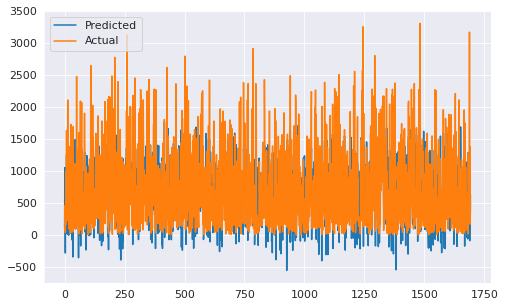

In [51]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0, 0.5, 'Predicted')

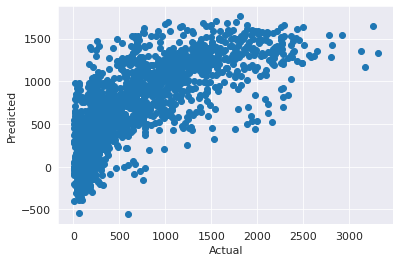

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

This R_squared is very low we can now Try scaling X and applying Squareroot on y to Make it close to normal distribution/

In [54]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

x = df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [55]:
y=np.sqrt(y)

In [56]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [58]:
y_pred = reg.predict(X_test)

In [59]:
MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error(y_test, y_pred)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

MAE : 5.592336640759783
RMSE : 7.431430471947076
R2 : 0.5996227959113041


In [ ]:
y_pred1=y_pred = reg.predict(X_train)
MAE  = mean_absolute_error(y_train,y_pred1)
MSE  = mean_squared_error(y_train, y_pred1)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred1)
print("R2 :" ,r2)

In [61]:
import plotly.express as px

fig = px.scatter_3d(df, x='Rainfall(mm)', y='Snowfall (cm)', z="Rented Bike Count",
                    size_max=18,
               opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

By aPPlying Square Root we are performing better, but results are still not satisfactory , we need to do feature Engineering

In [62]:
X=df.drop(columns=['Rented Bike Count'])
y=df['Rented Bike Count']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [63]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
MAE  = mean_absolute_error(y_test,y_pred)
MSE  = mean_squared_error(y_test, y_pred)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

MAE : 142.5850502067336
RMSE : 237.3216220275924
R2 : 0.8566956540294861


In [66]:
y_pred1=y_pred = regressor.predict(X_train)
MAE  = mean_absolute_error(y_train,y_pred1)
MSE  = mean_squared_error(y_train, y_pred1)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train, y_pred1)
print("R2 :" ,r2)

MAE : 50.81448759598346
RMSE : 84.67065914284589
R2 : 0.982820331894579


Applying Square root on Y

In [67]:
y_test=np.sqrt(y_test)
y_train=np.sqrt(y_train)

In [68]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [69]:
y_pred = regressor.predict(X_test)

In [70]:
MAE  = mean_absolute_error(y_test**2,y_pred**2)
MSE  = mean_squared_error(y_test**2, y_pred**2)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test**2, y_pred**2)
print('r_squarerd',r2)

MAE : 140.5241486539881
RMSE : 232.62499680854827
r_squarerd 0.8623115516325734


In [71]:
y_pred1=y_pred = regressor.predict(X_train)
MAE  = mean_absolute_error(y_train**2,y_pred1**2)
MSE  = mean_squared_error(y_train**2, y_pred1**2)
print("MAE :" , MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_train**2, y_pred1**2)
print("R2 :" ,r2)

MAE : 49.779878327385845
RMSE : 83.72779153443676
R2 : 0.9832008170309058


Doesnt helps in removing the overfitting

In [72]:
importances=regressor.feature_importances_

In [73]:
indices = np.argsort(importances)

In [74]:
features = df.drop('Rented Bike Count',axis=1).columns.to_list()

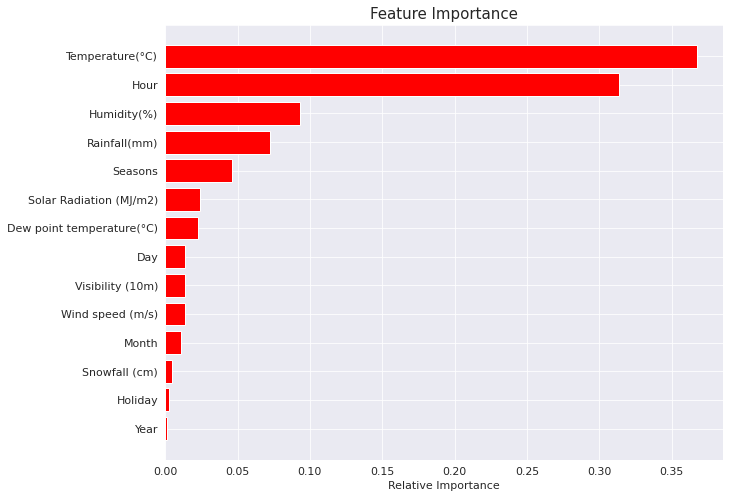

In [75]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')

plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Decision Tree Regressor**

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeRegressor()

In [77]:
criterion = ['mse','mae']

# Maximum depth of trees
max_depth = [4 ,8,12]

param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse', 'mae'], 'max_depth': [4, 8, 12]}

In [78]:
dtreg = DecisionTreeRegressor()

# Grid search
dt_ranGrid = RandomizedSearchCV(estimator = dtreg,param_distributions= param_dict,n_jobs=-1,
                       cv = 3, verbose=2, scoring ='r2')

dt_ranGrid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [4, 8, 12]},
                   scoring='r2', verbose=2)

In [79]:
best_params=dt_ranGrid.best_params_
Estimators=dt_ranGrid.best_estimator_

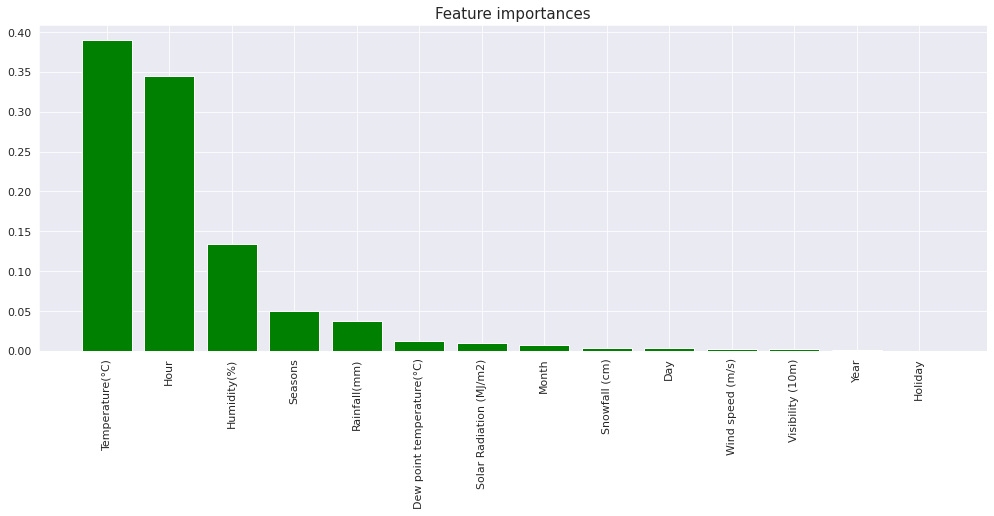

In [80]:
feature_importances_dtR = pd.DataFrame(Estimators.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_dtR']).sort_values('importance_dtR',
                                                                        ascending=False)
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_dtR.index, feature_importances_dtR['importance_dtR'],
        color="g",)
plt.xticks(feature_importances_dtR.index, rotation = 90)
plt.show()

In [81]:
y_pred_train=Estimators.predict(X_train)
r2_score(y_train,y_pred_train )

0.8781210138986569

In [82]:
y_pred_test=Estimators.predict(X_test)
r2_score(y_test,y_pred_test )

0.7917525522665418

It Is Overfitting Into the Training Data

#**Gradiant Boosting Algorithm**

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [94]:
ensemble.fit(X_train,y_train)

GradientBoostingRegressor()

In [95]:
y_pred=ensemble.predict(X_test)

In [97]:
r2_score(y_test, y_pred)

0.851446606995352

In [102]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8502071865531201


**Conclusion:**

---


When we compare the root mean squared error and mean absolute error of all the models, the GradiantBoosting model has less root mean squared error and mean absolute error, ending with the accuracy of 85% . So, finally this model is best for predicting the bike rental count on daily basis. As we can see the total amount of bike rentals increases with the temperature per month. Whereas it seems that the rentals are independent of the wind speed and the humidity, because they are almost constant over the months. This also confirms on the one hand the high correlation between rentals and temperature and on the other hand that nice weather could be a good predictor.So people mainly rent bikes on nice days and nice temperature. This could be important of planning new bike rental stations.